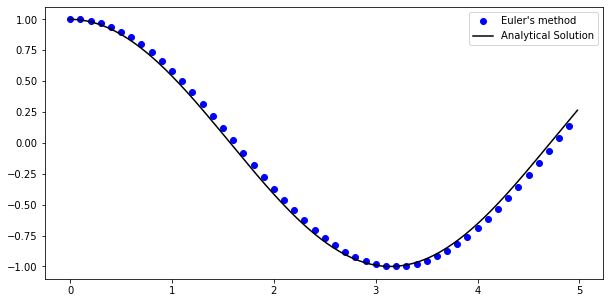

In [ ]:
#author: batuhan koyuncu
#blog at bkoyuncu@github.io

import numpy as np
import matplotlib.pyplot as plt
import math


def f_prime(x,y):
    y_prime = -np.sin(x)
    return y_prime

def euler(givenfunction,x0,y0,h,n,i):
    m=givenfunction(x0,y0)
    y1=y0+h*m
    x1=x0+h
    i=i+1
    if i==n:
        xs.append(round(x1,2))
        ys.append(round(y1,5))
        return (x1,y1)
    else:
        xs.append(round(x1,2))
        ys.append(round(y1,5))
        return euler(givenfunction,x1,y1,h,n,i)

delta=0.1
x0=0
y0=1
n=len(np.arange(0, 5.0, delta))
xs=[x0]
ys=[y0]

_=euler(f_prime,x0,y0,delta,n,i=1)



def f(x):
    y=np.cos(x)
    return y
    
x_range = np.arange(0.0, 5.0, 0.02)

plt.figure(figsize=(10,5))
plt.plot(xs,ys,'bo',label='Euler\'s method')
plt.plot(x_range, f(x_range), 'k', label='Analytical Solution')
plt.legend()
plt.show()



In [ ]:
import torch

#function F
def Func(x):
    
    y = 1+0.5*np.exp(-4*x)-0.5*np.exp(-2*x)
    return y


#dataset
delta=0.1
x = np.arange(-1,4,delta)
y = Func(x)

#sample sorted sequences in dataset
N = 1000
seq_len=5
data = np.empty((N,2,seq_len))
for i in range(N):
    mask = np.sort(np.random.choice(np.arange(0,len(x),1), seq_len, replace=False))
    X = x[mask]
    Y = y[mask]
    data[i]= np.stack((X,Y))

#neural network for approximating f which is derivative of F
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim





class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 8)
        self.fc3 = nn.Linear(8, 4)
        self.fc4 = nn.Linear(4, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = (self.fc4(x))
        return x



In [ ]:
#initialize the network
net = Net()

#initialize loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(),lr=0.0005)



In [ ]:

#training
N=1000
epochs=10
bs = 1
for epoch in range(epochs):
  print("epoch ",epoch+1)
  loss_sum = []
  for index in range(N):
    optimizer.zero_grad()
    Ys=torch.zeros((1,seq_len-1))
    data_point_X = data[index,[0]]
    data_point_Y = data[index,[1]]

    X = torch.Tensor(data_point_X[:,0])
    Y = torch.Tensor(data_point_Y[:,0])
    XY = torch.stack([X,Y]).view(bs,2).detach()

    for j in range(data_point_X.shape[1]-1):
      for i in np.arange(data_point_X[:,j][0],data_point_X[:,j+1][0],delta):

        m_net_out = net(XY.detach())
        Y=(Y.detach()+delta*m_net_out[0])
        X=(X+delta)
        XY = torch.stack([X,Y]).view(bs,2)
      Ys[0,j]=Y
    loss = criterion(Ys,torch.Tensor(data_point_Y[:,1:seq_len]))
    loss.backward()
    #print("loss",loss.item())
    loss_sum.append(loss.item())
    optimizer.step()
  print("mean_loss ",np.mean(loss_sum))

epoch  1
mean_loss  39.324684711307285
epoch  2
mean_loss  6.449610434442759
epoch  3
mean_loss  0.810181903532357
epoch  4
mean_loss  0.027068682976714626
epoch  5
mean_loss  0.0024878134404303863
epoch  6
mean_loss  0.0010414793523154913
epoch  7
mean_loss  0.000545735847567812
epoch  8
mean_loss  0.00044051753868370726
epoch  9
mean_loss  0.0003051206251448093
epoch  10
mean_loss  0.00020737694265881147


In [ ]:


#inference
x = np.arange(-1,4,delta)
y0 = Func(-1)
X = torch.Tensor([x[0]])
Y = torch.Tensor([y0])

XY = torch.stack([X,Y]).view(bs,2).detach()
Ys=torch.zeros((1,len(x)))
net.eval()
Ys[0,0]=y0
with torch.no_grad():
  for i in range(len(x)-1):
      m_net_out = net(XY)
      Y=(Y+delta*m_net_out[0])
      X=(X+delta)
      XY = torch.stack([X,Y]).view(bs,2)
      Ys[0,i+1]=Y
        

#real trajectory
x_compare = np.arange(-1,4,0.01)
y_compare = Func(x_compare) 

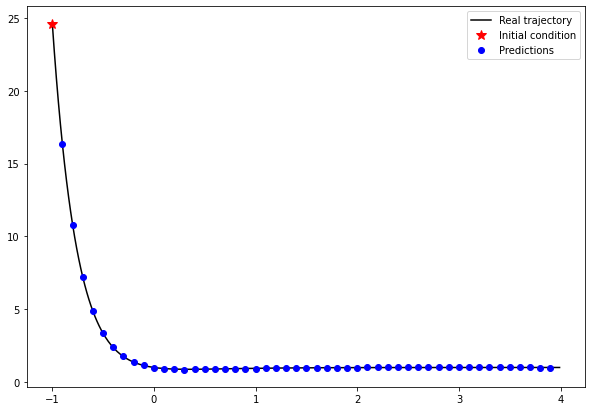

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(x_compare,y_compare,'k',label='Real trajectory')
plt.plot(x[0], Ys.numpy().reshape(len(x))[0], 'r*', label='Initial condition', ms=10)
plt.plot(x[1:], Ys.numpy().reshape(len(x))[1:], 'bo', label='Predictions')
plt.legend()
plt.show()